# 第二次作業

In [61]:
# 13.95, 13.100, 13.130, 13.156

In [62]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.stats.api as sms
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 150

<div style="background-color:#D9D9D9;"><font size="5"> 13.95</font></div>

In [63]:
df1 = pd.read_excel('Xr13-95.xlsx')
display(df1.head())
display(df1.tail())

,This Year,Last Year
0,189,151
1,225,224
2,106,30
3,146,132
4,234,233


,This Year,Last Year
35,104,102
36,275,242
37,137,82
38,128,148
39,159,179


In [64]:
samp1 = df1['This Year'].values
samp2 = df1['Last Year'].values

samp_diff = samp1 - samp2
nobs = samp_diff.shape[0]
df = nobs - 1
print("degree of freedom = ", df)

tmpdesc = stats.describe(samp_diff)
t_value = tmpdesc.mean / (tmpdesc.variance ** 0.5) * (nobs ** 0.5)
print(f"t-value = {t_value:.4f}")
# tmpdesc

# p-values
ptmp = stats.t.cdf(t_value, df)
p_value_left = ptmp
p_value_right = 1 - ptmp
if ptmp > 0.5:
    ptmp = 1 - ptmp
p_value_twoside = ptmp * 2

print(f"p_value (two sided) = {p_value_twoside:.4f}")
print(f"p_value (right tail) = {p_value_right:.4f}")
print(f"p_value (left tail) = {p_value_left:.4f}")

degree of freedom =  39
t-value = 4.0775
p_value (two sided) = 0.0002
p_value (right tail) = 0.0001
p_value (left tail) = 0.9999


In [65]:
#(a)
# Use a significance level of 0.10
t_alpha = stats.t.ppf(1 - 0.10 / 2, df)
std_xbar = (tmpdesc.variance / nobs) ** 0.5
LCL = tmpdesc.mean - t_alpha * std_xbar
UCL = tmpdesc.mean + t_alpha * std_xbar
print("(a.) Improvement in sales between two years under 90 percent confidence is = [%0.4f, %0.4f] thousands dollar." % (LCL, UCL))

(a.) Improvement in sales between two years under 90 percent confidence is = [11.5890, 27.9110] thousands dollar.


### H0:μ1-μ2<=0 , 
### H1:μ1-μ2>0
(b.) From the result above, we can show that in the right tail test, the p_value is only 0.0001, which is much smaller than our significant level. So we have overwhelming evidence to reject the null hypothesis in favor of the alternative one and conclude that advertising in the Yellow Pages improves sales.

(c.) the difference between the paired difference is approximately normal, so we can apply the t-test


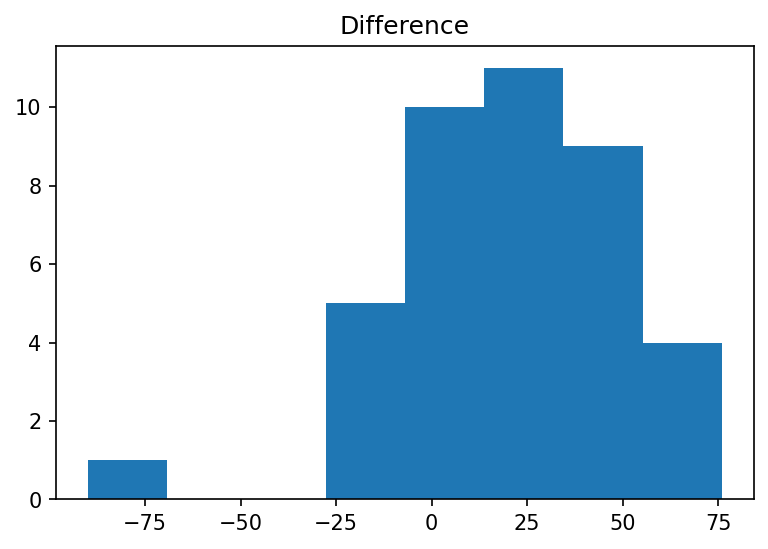

In [66]:
fig = plt.hist(samp_diff, bins='auto')
plt.title('Difference')
print("(c.) the difference between the paired difference is approximately normal, so we can apply the t-test")

(d.) No, using Matched-Pair Experiment can lower the variability and focus more on the aimed target.By controlling some of the variables.

<div style="background-color:#D9D9D9;"><font size="5"> 13.100</font></div>

### H0:μ1-μ2<=0 , 
### H1:μ1-μ2>0

In [67]:
df1 = pd.read_excel('Xr13-100.xlsx')
display(df1.head())
display(df1.tail())

,Company 1,Company 2
0,12859,9449
1,6082,5694
2,8604,7457
3,9230,7725
4,10405,10163


,Company 1,Company 2
50,11815,9631
51,6069,7798
52,12073,13252
53,6466,7274
54,9782,11055


In [68]:
samp1 = df1['Company 1'].values
samp2 = df1['Company 2'].values

samp_diff = samp1 - samp2
#print(samp_diff.mean())
nobs = samp_diff.shape[0]
df = nobs - 1
print("degree of freedom = ", df)

tmpdesc = stats.describe(samp_diff)
t_value = tmpdesc.mean / (tmpdesc.variance ** 0.5) * (nobs ** 0.5)
print(f"t-value = {t_value:.4f}")
# tmpdesc

# p-values
ptmp = stats.t.cdf(t_value, df)
p_value_left = ptmp
p_value_right = 1 - ptmp
if ptmp > 0.5:
    ptmp = 1 - ptmp
p_value_twoside = ptmp * 2

print(f"p_value (two sided) = {p_value_twoside:.4f}")
print(f"p_value (right tail) = {p_value_right:.4f}")
print(f"p_value (left tail) = {p_value_left:.4f}")

degree of freedom =  54
t-value = 2.0824
p_value (two sided) = 0.0421
p_value (right tail) = 0.0210
p_value (left tail) = 0.9790


Based on the above result, the right tail p_value is 0.0210, which is smaller than our significance level 0.05, so we have sufficient evidence to reject the null hypothesis in favor of the alternative one, and conclude that company 1’s service results in higher tax payable

<div style="background-color:#D9D9D9;"><font size="5"> 13.130</font></div>

### H0 : p1-p2<=0
### H1 : p1-p2>0

In [69]:
p1 = 47/229
p2 = 25/178
p_pool = (47+25)/(229+178)
sd_p_pool = (p_pool * (1 - p_pool) * 
             (1 / 229 + 1 / 178)) ** 0.5
z_value = (p1 - p2) / sd_p_pool
print(f"p1 = {p1:.4f}")
print(f"p2 = {p2:.4f}")
print(f"sd_p_pool = {sd_p_pool:.4f}")
print(f"z-value = {z_value:.4f}")
p_value = 1 - stats.norm.cdf(z_value)
print(f"p-value = {p_value:.4f}")

p1 = 0.2052
p2 = 0.1404
sd_p_pool = 0.0381
z-value = 1.6992
p-value = 0.0446


Because p-value < 0.1, reject H0. There is sufficient evidence to conclude at the 10% significance level, that those who paid the regular price are more likely to buy an extended warranty. 

<div style="background-color:#D9D9D9;"><font size="5"> 13.156</font></div>

In [70]:
df3 = pd.read_excel('Xr13-156.xlsx')
print(df3['Religion'].value_counts())
print('Head of dataset:')
display(df3.head())
print("Tail of dataset:")
display(df3.tail())
No_R = df3['No religion']
No_R = No_R == 1
Y_R = df3['Religion']
Y_R = Y_R == 1

2    2960
1     240
Name: Religion, dtype: int64
Head of dataset:


,No religion,Religion,Wallonian
0,2,2,1
1,2,2,1
2,2,2,1
3,1,2,1
4,2,2,1


Tail of dataset:


,No religion,Religion,Wallonian
3195,2,2,1
3196,2,2,1
3197,2,2,1
3198,2,2,1
3199,2,2,1


In [71]:
p1 = No_R.mean()
p2 = Y_R.mean()
R12 = np.concatenate([No_R, Y_R])
p_pool = R12.mean()
sd_p_pool = (p_pool * (1 - p_pool) * 
             (1 / No_R.shape[0] + 1 / Y_R.shape[0])) ** 0.5
z_value = (p1 - p2) / sd_p_pool
print(f"p1 = {p1:.4f}")
print(f"p2 = {p2:.4f}")
print(f"sd_p_pool = {sd_p_pool:.4f}")
print(f"z-value = {z_value:.4f}")
p_value = 1 - stats.norm.cdf(z_value)
print(f"p-value = {p_value:.4f}")

p1 = 0.0850
p2 = 0.0750
sd_p_pool = 0.0068
z-value = 1.4744
p-value = 0.0702


### H0 : p1-p2<=0
### H1 : p1-p2>0

Since p-value = 0.0702 > 0.05, can't reject the null hypothesis .There is insufficient evidence to infer that at the 5% significance level, that resumes including a reference to religious activity reduces the probability of a call back.